<a href="https://colab.research.google.com/github/adigup390/deepintocnn/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import torch
from torchvision import datasets,transforms
import helper

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = True, transform  = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64,shuffle = True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = False, transform  = transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size = 64,shuffle = True)


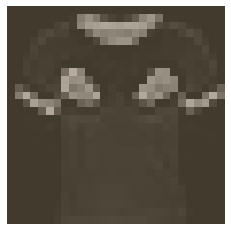

In [66]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

In [67]:
from torch import nn
model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,64),
                      nn.ReLU(),
                      nn.Linear(64,64),
                      nn.ReLU(),
                      nn.Linear(64,32),
                      nn.ReLU(),
                      nn.Linear(32,10),
                      nn.LogSoftmax(dim = 1))
print(model)


Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): ReLU()
  (8): Linear(in_features=32, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)


In [76]:
criterion = nn.NLLLoss()

from torch import optim
optimizer = optim.SGD(model.parameters(),lr = 0.015)


In [78]:
epochs = 20
for i in range(epochs):
    running_loss = 0
    for images,labels in iter(trainloader):
        optimizer.zero_grad()
        input = images.resize_(images.shape[0],784)
        output = model(input)
        loss = criterion(output,labels)
        running_loss+= loss
        loss.backward()
        optimizer.step()
    print(f"Loss = {running_loss}")

Loss = 0.593212366104126
Loss = 0.5642447471618652
Loss = 0.5256668925285339
Loss = 0.5096140503883362
Loss = 0.4931884706020355
Loss = 0.4731065630912781
Loss = 0.44546061754226685
Loss = 0.42988765239715576
Loss = 0.41886502504348755
Loss = 0.4046832323074341
Loss = 0.38971367478370667
Loss = 0.3761575222015381
Loss = 0.36499759554862976
Loss = 0.3551250994205475
Loss = 0.34118908643722534
Loss = 0.33328017592430115
Loss = 0.3199946880340576
Loss = 0.3128839433193207
Loss = 0.3053848147392273
Loss = 0.295622318983078


In [87]:
correct = 0
total = 0
for image,label in testloader:
  input = image.resize_(image.shape[0],784)
  output = model(input)
  predicted = torch.argmax(output,dim = 1,keepdim = True)
  total += predicted.size(0)
  correct+= (predicted==label).sum().item()
print(total)
print(correct)
print(f"Accuracy = {correct/total*100}")

60000
438466
Accuracy = 730.7766666666666
